In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('healthcare_dataset.csv')
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


## Información del Dataset

In [24]:
# df.head()
# df.tail()
# df.info()
# df.nunique()
print((df.isnull().sum()/len(df))*100) # Porcentaje de valores nulos

Name                  0.0
Age                   0.0
Gender                0.0
Blood Type            0.0
Medical Condition     0.0
Date of Admission     0.0
Doctor                0.0
Hospital              0.0
Insurance Provider    0.0
Billing Amount        0.0
Room Number           0.0
Admission Type        0.0
Discharge Date        0.0
Medication            0.0
Test Results          0.0
dtype: float64


## Depuracion de datos

In [25]:
used_columns = ['Age', 'Gender', 'Blood Type', 'Medical Condition','Date of Admission', 'Insurance Provider', 'Billing Amount', 'Discharge Date']

for col in df.columns:
    if col not in used_columns:
        df = df.drop(col, axis=1)

df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 10000 non-null  int64         
 1   Gender              10000 non-null  object        
 2   Blood Type          10000 non-null  object        
 3   Medical Condition   10000 non-null  object        
 4   Date of Admission   10000 non-null  datetime64[ns]
 5   Insurance Provider  10000 non-null  object        
 6   Billing Amount      10000 non-null  float64       
 7   Discharge Date      10000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 625.1+ KB


## Creación de variables

In [26]:
df['Hospital Time Spent'] = df['Discharge Date'] - df['Date of Admission']

## Resumen estadístico

In [27]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Age,10000.0,NaN,NaN,NaN,51.4522,18.0,35.0,52.0,68.0,85.0,19.588974
Gender,10000,2,Female,5075,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood Type,10000,8,AB-,1275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medical Condition,10000,6,Asthma,1708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Admission,10000,NaN,NaN,NaN,2021-05-01 21:53:25.439999744,2018-10-30 00:00:00,2020-02-10 00:00:00,2021-05-02 00:00:00,2022-07-23 06:00:00,2023-10-30 00:00:00,NaN
Insurance Provider,10000,5,Cigna,2040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Billing Amount,10000.0,NaN,NaN,NaN,25516.806778,1000.180837,13506.523967,25258.112566,37733.913727,49995.902283,14067.292709
Discharge Date,10000,NaN,NaN,NaN,2021-05-17 11:22:24.960000,2018-11-01 00:00:00,2020-02-23 18:00:00,2021-05-18 00:00:00,2022-08-07 00:00:00,2023-11-27 00:00:00,NaN
Hospital Time Spent,10000,NaN,NaN,NaN,15 days 13:28:59.520000,1 days 00:00:00,8 days 00:00:00,16 days 00:00:00,23 days 00:00:00,30 days 00:00:00,8 days 14:41:20.078014738


## Separar datos cualitativos y cuantitativos

In [28]:
qualitative_cols = df.select_dtypes(include=['object', 'datetime64']).columns
quantitative_cols = df.select_dtypes(include=[np.number], exclude=['timedelta64']).columns.tolist()
print(qualitative_cols)
print(quantitative_cols)

Index(['Gender', 'Blood Type', 'Medical Condition', 'Date of Admission',
       'Insurance Provider', 'Discharge Date'],
      dtype='object')
['Age', 'Billing Amount']


### Datos cuantitativos

Age
Skew:  -0.01


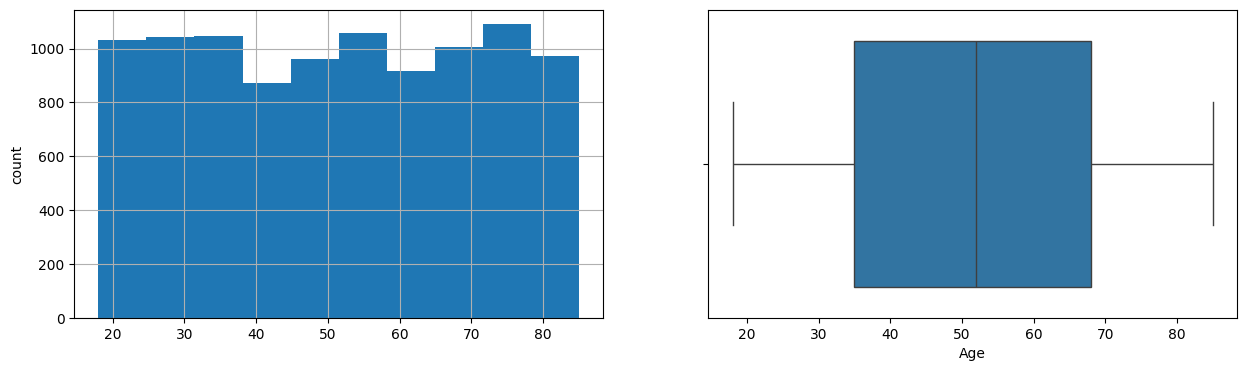

Billing Amount
Skew:  0.01


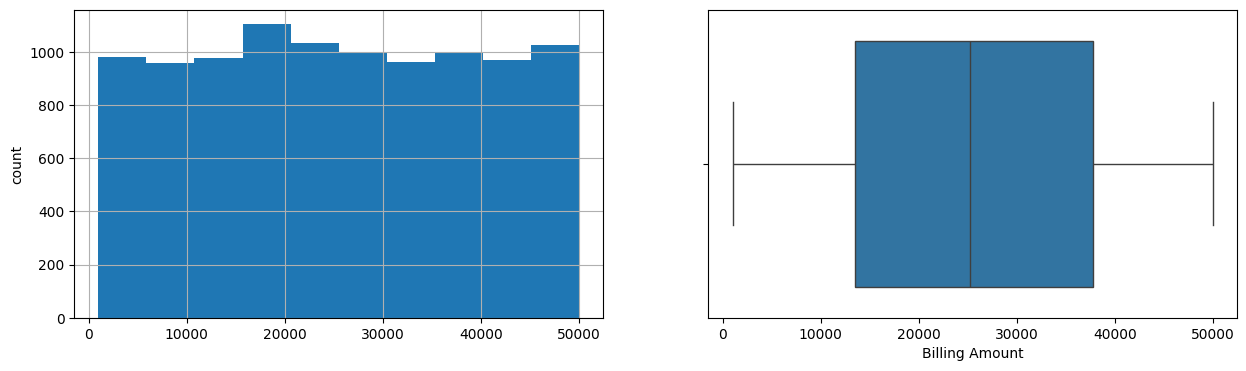

In [43]:
for col in quantitative_cols:
    print(col)
    print('Skew: ', round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    # -----------------------
    plt.subplot(1,2,1)
    df[col].hist()
    plt.ylabel('count')
    # -----------------------
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

## Transformación de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Age                  10000 non-null  int64          
 1   Gender               10000 non-null  object         
 2   Blood Type           10000 non-null  object         
 3   Medical Condition    10000 non-null  object         
 4   Date of Admission    10000 non-null  datetime64[ns] 
 5   Insurance Provider   10000 non-null  object         
 6   Billing Amount       10000 non-null  float64        
 7   Discharge Date       10000 non-null  datetime64[ns] 
 8   Hospital Time Spent  10000 non-null  timedelta64[ns]
 9   Billing Amount_log   10000 non-null  float64        
 10  Age_log              10000 non-null  float64        
 11  Billing Amount_std   10000 non-null  float64        
 12  Age_std              10000 non-null  float64        
dtypes: datetime64[ns]

C:\Users\javil\AppData\Local\Temp\ipykernel_37804\3341303070.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], axlabel='Age')


<Axes: xlabel='Age', ylabel='Density'>

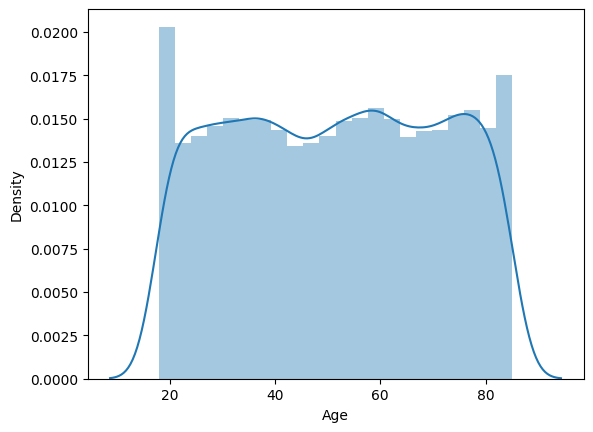

In [39]:
def log_transform(df, cols):
    for col_name in cols:
        if(df[col] == 1.0).all():
            df[col_name+'_log'] = np.log(df[col_name]+1)
        else:
            df[col_name+'_log'] = np.log(df[col_name])

def std_transform(df, cols):
    for col_name in cols:
        df[col_name+'_std'] = np.std(df[col_name])

df.head()
log_transform(df, ['Billing Amount', 'Age'])
std_transform(df, ['Billing Amount', 'Age'])
df.info()
df.head()

sns.distplot(df['Age'], axlabel='Age')

C:\Users\javil\AppData\Local\Temp\ipykernel_37804\689745614.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age_std'], axlabel='Age_std')
c:\Users\javil\OneDrive - Facultad de Ingeniería de la Universidad de San Carlos de Guatemala\Erick\Seminario2\Demo\fase2\venv\Lib\site-packages\seaborn\distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='Age_std', ylabel='Density'>

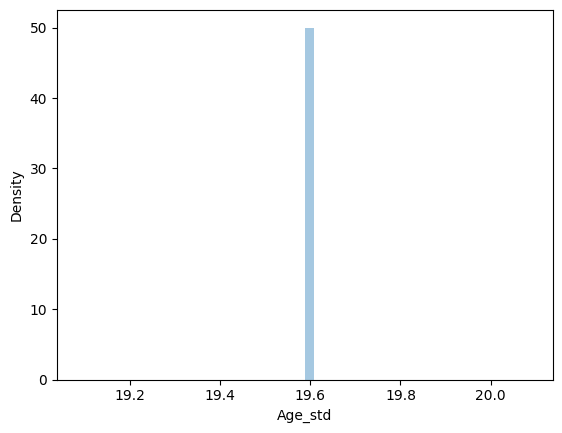

In [40]:

sns.distplot(df['Age_std'], axlabel='Age_std')

## EDA Multivariable

In [47]:
plt.figure(figsize=(15,17))
print(df.head())
# sns.pairplot(data=df)
plt.show()

   Age  Gender Blood Type Medical Condition Date of Admission  \
0   81  Female         O-          Diabetes        2022-11-17   
1   35    Male         O+            Asthma        2023-06-01   
2   61    Male         B-           Obesity        2019-01-09   
3   49    Male         B-            Asthma        2020-05-02   
4   51    Male         O-         Arthritis        2021-07-09   

  Insurance Provider  Billing Amount Discharge Date Hospital Time Spent  \
0           Medicare    37490.983364     2022-12-01             14 days   
1   UnitedHealthcare    47304.064845     2023-06-15             14 days   
2           Medicare    36874.896997     2019-02-08             30 days   
3           Medicare    23303.322092     2020-05-03              1 days   
4   UnitedHealthcare    18086.344184     2021-08-02             24 days   

   Billing Amount_log   Age_log  Billing Amount_std    Age_std  
0           10.531856  4.394449        14066.589327  19.587994  
1           10.764352  3.555

<Figure size 1500x1700 with 0 Axes>